In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tb_convert import parse_tensorboard

2023-01-09 16:09:38.147873: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
%pwd
%cd ../../ml/Tensorboard/

/home/tomje/ml/Tensorboard


In [75]:
results = pd.read_csv(r'MLP_WIN/hparam_test/Results/hparams_table.csv')
# results.sort_values(by=['epochs','no_nodes']).reset_index(drop=True)

Attempt to load in scalar data to pandas

In [4]:
scalars = ['cv_iter/mse', 'cv_iter/mae', 'cv_iter/r2']
folder = r'MLP_WIN/hparam_test/'
dirs = os.listdir(folder)
a = ['MLP_Win-', 'MLP-', 'LSTM-']
dirs = [x for x in dirs if any(a in x for a in a)]
dirs.sort()

df = {x: parse_tensorboard(os.path.join(folder, x), scalars)
                        for x in dirs}
df = pd.concat(df.values(), keys=df.keys())

In [48]:
results['trial_id'] = df.index.levels[0]
for col in df.columns.values:
    if 'mse' in col:
        scale = 1e6
    elif 'mae' in col:
        scale = 1e3
    else:
        scale = 1
            
    data = [df.loc[trial_id][col].values * scale for trial_id in df.index.levels[0]]
    results[col] = data
results

,no_nodes,epochs,seq_len,loss,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²,trial_id,cv_iter/mse,cv_iter/mae,cv_iter/r2
0,128.0,1500.0,10.0,mse,3.041715,26.184292,0.759220,0.719786,18.712898,0.142086,4.568545,32.755013,0.700309,MLP_Win-WLEN-10-E-1500-B-10-L-[128 128]-D-0.1-...,"[23.851416, 16.195932, 27.223627, 7.750772, 13...","[3.7389061, 2.9865184, 4.066942, 2.0087771, 2....","[0.6299945, 0.8646, 0.6763248, 0.90373176, 0.8..."
1,128.0,1500.0,10.0,mae,4.461048,53.616871,0.511081,1.448921,28.152100,0.220503,4.091036,46.330959,0.586839,MLP_Win-WLEN-10-E-1500-B-10-L-[128 128]-D-0.1-...,"[115.56259, 59.412426, 11.314222, 59.40471, 31...","[7.0905647, 5.8245196, 2.4508986, 5.779875, 3....","[0.10383586, 0.34743276, 0.82445323, 0.4622579..."
2,256.0,1500.0,10.0,mse,4.123917,39.624775,0.635774,1.000398,23.072596,0.143812,3.437597,30.377842,0.746773,MLP_Win-WLEN-10-E-1500-B-10-L-[256 256]-D-0.1-...,"[22.623034, 28.491386, 42.926693, 15.827827, 2...","[3.588597, 4.093763, 4.67041, 3.1640792, 3.234...","[0.7363301, 0.59545267, 0.6574985, 0.78981936,..."
3,256.0,1500.0,10.0,mae,5.089021,59.189140,0.429593,1.485985,30.001003,0.226361,6.878011,118.187737,0.158679,MLP_Win-WLEN-10-E-1500-B-10-L-[256 256]-D-0.1-...,"[19.891617, 104.49443, 48.680542, 52.97047, 60...","[2.4405992, 6.4873714, 5.856233, 4.259284, 5.6...","[0.7053074, 0.17308111, 0.417012, 0.5219648, 0..."
4,64.0,1500.0,10.0,mse,2.913126,21.780733,0.794947,0.818680,13.498418,0.108469,3.255514,27.363352,0.772363,MLP_Win-WLEN-10-E-1500-B-10-L-[64 64]-D-0.1-20...,"[23.251831, 15.109744, 21.016468, 27.620792, 2...","[2.19051, 3.2842796, 3.0681243, 3.2308698, 3.4...","[0.73647654, 0.7951097, 0.82165915, 0.76691717..."
5,64.0,1500.0,10.0,mae,4.645790,60.053066,0.464125,1.757492,39.534927,0.266180,2.692878,23.416412,0.790346,MLP_Win-WLEN-10-E-1500-B-10-L-[64 64]-D-0.1-20...,"[68.78322, 27.372444, 78.02389, 13.24075, 51.2...","[4.6392198, 2.675507, 7.0910254, 2.7308955, 5....","[0.47730848, 0.7636328, -0.09186084, 0.8555518..."
6,128.0,1500.0,15.0,mse,2.260933,14.594619,0.867315,0.656340,10.906906,0.087456,2.512518,15.934709,0.847332,MLP_Win-WLEN-15-E-1500-B-10-L-[128 128]-D-0.1-...,"[13.754115, 3.1611166, 20.479074, 5.048076, 7....","[2.5370674, 1.4044113, 3.096101, 1.6648419, 1....","[0.86310095, 0.9733166, 0.8322566, 0.9351457, ..."
7,128.0,1500.0,15.0,mae,5.507531,71.983665,0.377562,1.808976,44.300335,0.269979,5.114270,51.987812,0.468386,MLP_Win-WLEN-15-E-1500-B-10-L-[128 128]-D-0.1-...,"[59.275307, 103.316635, 42.55744, 68.30704, 16...","[5.020271, 7.818574, 4.3997064, 5.5888495, 2.5...","[0.48408604, -0.0044810795, 0.3419353, 0.44378..."
8,256.0,1500.0,15.0,mse,4.476169,45.707912,0.583391,1.063974,22.311766,0.166909,5.686758,63.492764,0.404019,MLP_Win-WLEN-15-E-1500-B-10-L-[256 256]-D-0.1-...,"[59.1422, 35.714504, 28.264336, 69.61034, 65.7...","[5.291838, 4.627039, 3.3532324, 4.917611, 4.26...","[0.44416583, 0.7297213, 0.7731211, 0.40639797,..."
9,256.0,1500.0,15.0,mae,5.245096,63.710457,0.427592,1.468221,33.749699,0.210692,5.725161,65.283676,0.392335,MLP_Win-WLEN-15-E-1500-B-10-L-[256 256]-D-0.1-...,"[87.801315, 74.38013, 35.466747, 173.3717, 91....","[6.5363426, 5.9009995, 4.9365835, 9.642777, 6....","[0.3375446, 0.35214525, 0.5091617, -0.16580786..."


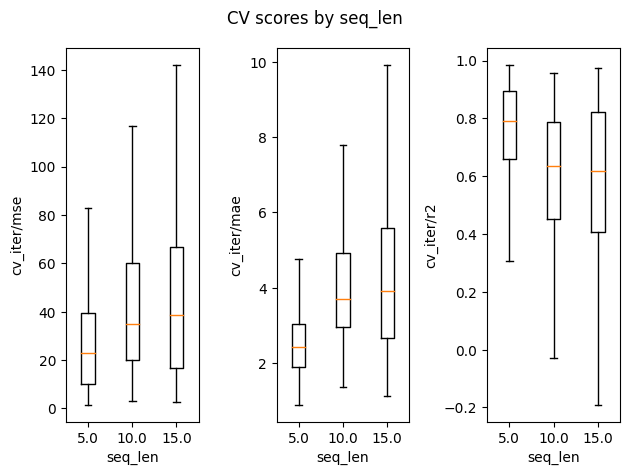

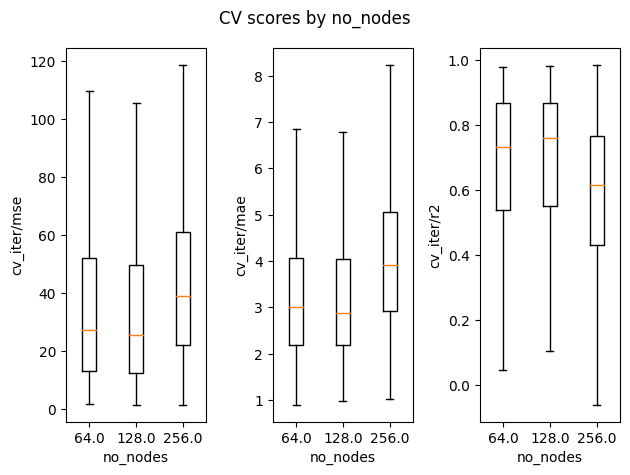

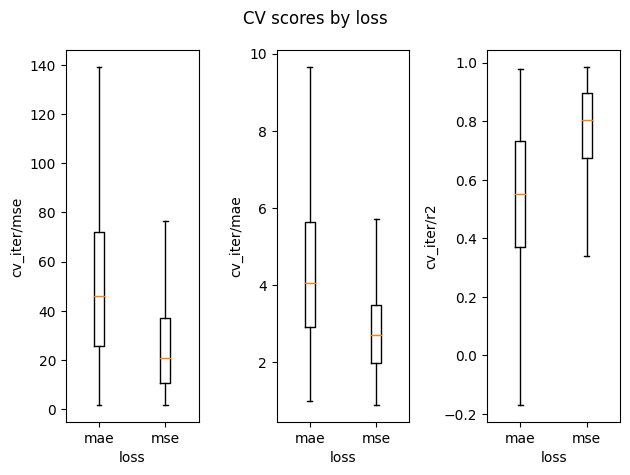

In [68]:
def cv_iter_boxplot(results, hparam, scalars):
    test = [results.groupby(hparam)[scalar].apply(np.hstack) for scalar in scalars]    
    test = pd.concat(test, axis=1)
    fig, axes = plt.subplots(1, 3)
    for i, ax in enumerate(axes):
        ax.boxplot(x=test.iloc[:,i], labels=test.index.values, showfliers=False)
        ax.set_xlabel(hparam)
        ax.set_ylabel(test.columns.values[i])
    fig.suptitle(f'CV scores by {hparam}')
    plt.tight_layout()

cv_iter_boxplot(results, 'seq_len', scalars)
cv_iter_boxplot(results, 'no_nodes', scalars)
cv_iter_boxplot(results, 'loss', scalars)

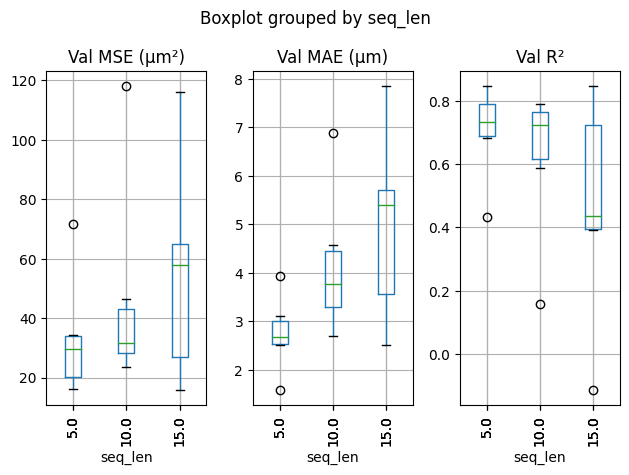

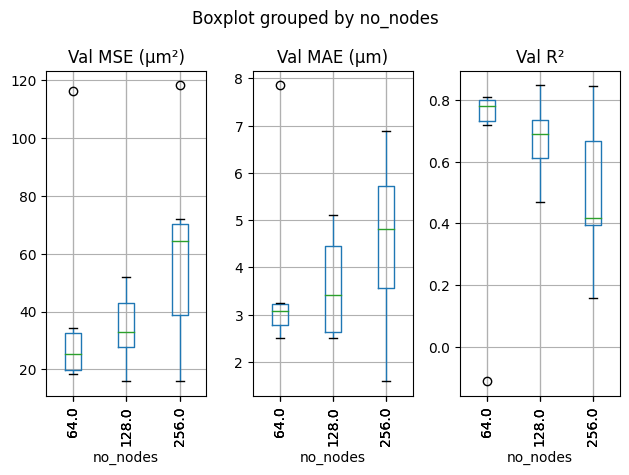

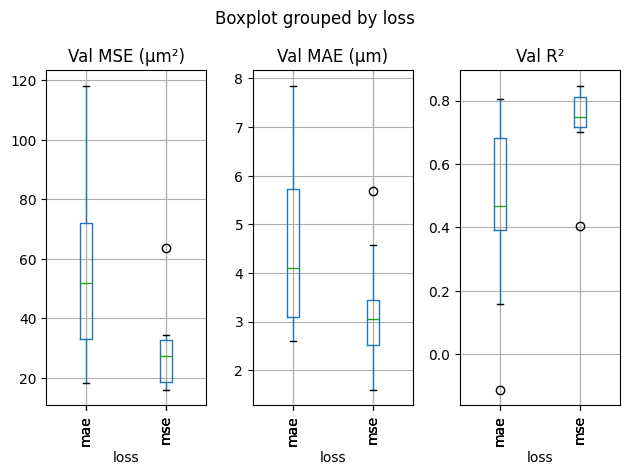

In [67]:
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='seq_len', layout=(1,3), rot=90, sharey=False);
plt.tight_layout()
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='no_nodes', layout=(1,3), rot=90, sharey=False);
plt.tight_layout()
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='loss', layout=(1,3), rot=90, sharey=False);
plt.tight_layout()

In [70]:
results.groupby(['seq_len']).mean(numeric_only=True)

,no_nodes,epochs,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
seq_len,,,,,,,,,,,
5.0,149.333333,1500.0,2.549164,29.527756,0.752847,0.758091,27.565098,0.186517,2.749803,33.314943,0.705187
10.0,149.333333,1500.0,4.045770,43.408146,0.599123,1.205210,25.495324,0.184568,4.153930,46.405219,0.625885
15.0,149.333333,1500.0,4.254098,47.094563,0.579090,1.257957,27.167821,0.188963,4.991235,55.226099,0.468299


In [71]:
results.groupby(['no_nodes']).mean(numeric_only=True)

,epochs,seq_len,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
no_nodes,,,,,,,,,,,
64.0,1500.0,10.0,3.437514,38.345494,0.661722,1.126717,26.420425,0.185888,3.744510,39.686898,0.630453
128.0,1500.0,10.0,3.346634,36.433001,0.680977,1.005058,24.423708,0.166268,3.606113,34.379720,0.672132
256.0,1500.0,10.0,4.064883,45.251971,0.588362,1.089484,29.384110,0.207893,4.544344,60.879642,0.496786


In [73]:
results.groupby(['loss']).mean(numeric_only=True)

,no_nodes,epochs,seq_len,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
loss,,,,,,,,,,,,
mae,149.333333,1500.0,10.0,4.364039,53.494619,0.524384,1.387465,33.378907,0.222467,4.667790,60.504658,0.467117
mse,149.333333,1500.0,10.0,2.868649,26.525692,0.762990,0.760041,20.106588,0.150899,3.262189,29.459516,0.732463
